<a href="https://colab.research.google.com/github/Minh-A/Data_Analysis/blob/main/Stock_Data_Analisys_210222.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 유전자 알고리즘

In [ ]:
# 구글드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import os
import glob
import random

import warnings
warnings.filterwarnings("ignore")

train = glob.glob('/content/drive/MyDrive/Colab Notebooks/Auto_Analisys/file/*.csv')
temp = pd.read_csv(train[6], encoding='cp949', index_col= 'Unnamed: 0')
dataset = temp.iloc[0:40]
dataset = dataset.loc[::-1].reset_index(drop = True)  # 위아래 뒤집기(날짜 뒤집기)
da = dataset.iloc[:,[2,3,4,6,7,8]]

# K-Means 모델
from sklearn.cluster import KMeans
import matplotlib.pyplot  as plt

k = 3
# create model and prediction
model = KMeans(n_clusters=k, algorithm='elkan')
model.fit(da)
predict = pd.DataFrame(model.predict(da))
predict.columns=['predict']

final_da = pd.DataFrame(np.hstack((predict, da)))


> 유전자 알고리즘 210117
* 모듈 분리
* 첫 번째 모듈은 K-Means 결과에 맞는 데이터 프레임 100개정도 생성
* 두 번째 모듈은 첫 번째 모듈에서 생성된 애들끼리 유전자 알고리즘으로 서로 교차(교배)

In [ ]:
# 유전자 알고리즘 210117
# 첫 번째 모듈
import random
import copy

k_result = 2  # K-Means 결과 정하기
aaa =  copy.deepcopy(final_da.iloc[39,1:])  # 시작행 초기화 (코드 실행시 마다)
branch = 1  # 나뭇가지
child = pd.DataFrame()  # 생존한 아이들


while 1:  # 1은 무한반복을 의미

  # 100개의 유전자 생성
  for i in range(100):

    # 교차할 유전자군 (랜덤)
    ge_fa = random.randint(0,2)  # 유전자군 랜덤
    ge_fadata = final_da.loc[final_da.iloc[:,0] == ge_fa,1:].reset_index(drop = True)  # 유전자 군

    # 유전자와 속성 선택
    ge_num = random.randint(0,len(ge_fadata) - 1)  # 행 선택(유전자 선택)
    ge_sel1 = random.randint(1,2)  # 속성 선택
    ge_sel2 = random.randint(3,4)
    ge_sel3 = random.randint(5,6)
    ge_sel = list([ge_sel1, ge_sel2, ge_sel3])
    sel = ge_fadata.loc[ge_num, ge_sel]  # 선택된 행렬에 대한 

    # 정상 유전자 교차
    aaa.loc[ge_sel] = sel.values

    # 돌연변이 생성 (유전자 1회 생성마다 30% 확률로 돌연변이 등장)
    if random.random() <= 0.3:
      mutation1 = random.randint(ge_fadata.loc[:,ge_sel1].min(), ge_fadata.loc[:,ge_sel1].max())
      mutation2 = random.randint(ge_fadata.loc[:,ge_sel2].min(), ge_fadata.loc[:,ge_sel2].max())
      mutation3 = random.randint(ge_fadata.loc[:,ge_sel3].min(), ge_fadata.loc[:,ge_sel3].max())
      mutation = list([mutation1, mutation2, mutation3])
      aaa.loc[ge_sel] = mutation
    
    # 생성된 아이들
    child = child.append(aaa)

  # 생성된 아이들로 모델 예측
  predict = pd.DataFrame(model.predict(child))

  # 살아남은 아이들 랜덤 하나만 생존
  child2 = pd.DataFrame(np.hstack((predict, child)))
  child = child2.loc[child2[0] == k_result, :].iloc[:,1:]  # 원하던 결과랑 같은 것들

  # 나뭇가지 표시
  print('%s branch' % branch)
  branch += 1
  
  # 1000명만 생성하고 전체 반복문 종료
  # print('중복 행: ',child[child.duplicated()])  # 중복행 찾기
  child = child.drop_duplicates()  # 중복 행 제거

  child = child.reset_index(drop = True)

  if len(child) >= 1000:
    break

# 생성된 아이들 확인
child

1 branch
2 branch
3 branch
4 branch
5 branch
6 branch
7 branch
8 branch
9 branch
10 branch
11 branch
12 branch
13 branch
14 branch
15 branch
16 branch
17 branch
18 branch
19 branch
20 branch
21 branch
22 branch
23 branch
24 branch
25 branch
26 branch
27 branch
28 branch
29 branch


,1,2,3,4,5,6
0,530.0,459169.0,405.0,590.0,590.0,528.0
1,541.0,505947.0,42.0,594.0,550.0,556.0
2,558.0,505947.0,260.0,594.0,550.0,551.0
3,558.0,531659.0,307.0,594.0,606.0,551.0
4,539.0,753514.0,405.0,552.0,568.0,536.0
...,...,...,...,...,...,...
996,561.0,454760.0,138.0,556.0,571.0,551.0
997,561.0,459169.0,138.0,590.0,590.0,551.0
998,577.0,490566.0,281.0,558.0,584.0,553.0
999,556.0,753514.0,405.0,558.0,568.0,563.0


# New_Algorithm

> 그래프 사이트
* https://www.desmos.com/calculator?lang=ko
* https://www.geogebra.org/3d

> 경사하강법
* https://teddylee777.github.io/scikit-learn/gradient-descent
* https://www.youtube.com/watch?v=GEdLNvPIbiM

> 경사하강법 그림 설명
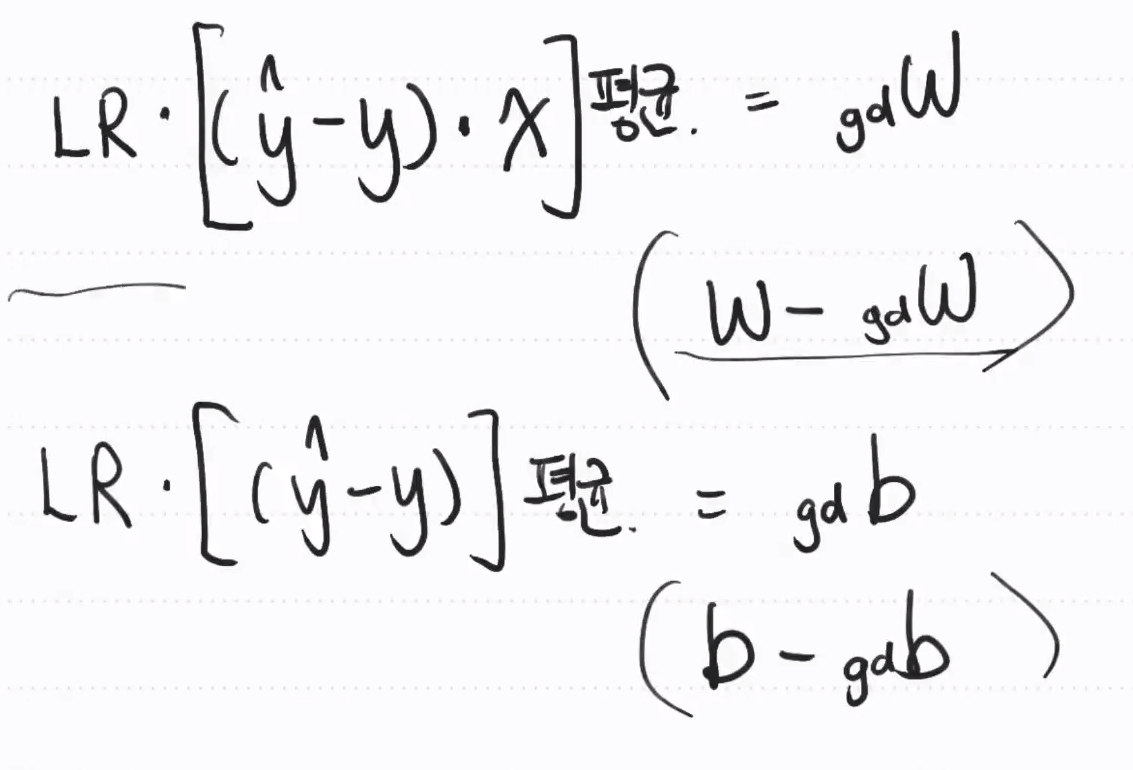


회귀방정식이 아닌 2차 함수, 원 방정식으로 거리를 구함

In [ ]:
import numpy
import scipy.special
import matplotlib.pyplot
%matplotlib inline

class Neuralnetwork:

  ### 신경망을 초기화하기
  def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
    # 계층의 노드 개수 결정
    self.inodes = inputnodes
    self.hnodes = hiddennodes
    self.onodes = outputnodes

    # 가중치
    self.wih = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
    self.who = numpy.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))

    # 학습률
    self.lr = learningrate

    # 활성화 함수로 시그모이드 함수를 사용
    self.activation_function = lambda x: scipy.special.expit(x)


  ### 신경망 학습
  def train(self, inputs_list, targets_list):
    inputs = numpy.array(inputs_list, ndmin=2).T
    targets = numpy.array(targets_list, ndmin=2).T

    # 은닉계층 
    hidden_inputs = numpy.dot(self.wih, inputs)
    hidden_outputs = self.activation_function(hidden_inputs)

    # 출력 계층
    final_inputs = numpy.dot(self.who, hidden_outputs)
    final_outputs = self.activation_function(final_inputs)

    # 오차
    output_errors = targets - final_outputs
    # 가중치에 의해 나눈 오차들을 계산
    hidden_errors = numpy.dot(self.who.T, output_errors)

    # 가중치 업데이트
    # 은닉, 출력
    self.who += self.lr * numpy.dot((output_errors*final_outputs*(1.0-final_outputs)), numpy.transpose(hidden_outputs))
    # 입력, 은닉
    self.wih += self.lr * numpy.dot((hidden_errors*hidden_outputs*(1.0-hidden_outputs)), numpy.transpose(inputs))


  ### 질의 
  def query(self, inputs_list):
    # 2차원의 행렬로 변환
    inputs = numpy.array(inputs_list, ndmin=2).T

    # 은닉계층 
    hidden_inputs = numpy.dot(self.wih, inputs)
    hidden_outputs = self.activation_function(hidden_inputs)

    # 출력 계층
    final_inputs = numpy.dot(self.who, hidden_outputs)
    final_outputs = self.activation_function(final_inputs)

    return final_outputs

In [ ]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import os
import glob
import random

In [ ]:
a = np.zeros((3,4))
a

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [ ]:
np.array(a, ndmin=2).T

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [ ]:
np.random.normal(0.0, pow(5, -0.5), (5, 3))

array([[ 0.01709418, -0.14177994,  0.31994459],
       [ 0.28614242,  0.68059989, -0.34280477],
       [-0.61176952,  0.08037856,  1.0073489 ],
       [-0.06736429, -0.3561728 ,  0.26563968],
       [-0.38769368,  0.48883334, -0.18250815]])

In [ ]:
pow(5, 12)

244140625

In [ ]:
# 사용할 것 
a = child.iloc[0:1,:]
b = child.iloc[1:2,:]

In [ ]:
a

,1,2,3,4,5,6
0,580.0,181692.0,103.0,590.0,577.0,564.0


In [ ]:
a = np.array(a)
a

array([[5.80000e+02, 1.81692e+05, 1.03000e+02, 5.90000e+02, 5.77000e+02,
        5.64000e+02]])

In [ ]:
(a[0][0]**2) + (a[0][1]**2) + (a[0][2]**2) + (a[0][3]**2) + (a[0][4]**2) + (a[0][5]**2)

33013328998.0

In [ ]:
import math 
math.sqrt((a[0][0]**2) + (a[0][1]**2) + (a[0][2]**2) + (a[0][3]**2) + (a[0][4]**2) + (a[0][5]**2))

181695.7044016176

In [ ]:
# 로그함수 적용

a = np.log1p(a)
a

array([[1.09751342, 1.27351218, 1.00454418, 1.09828546, 1.09727874,
        1.09624492]])

In [ ]:
a = np.expm1(a)
a

array([[5.80000e+02, 1.81692e+05, 1.03000e+02, 5.90000e+02, 5.77000e+02,
        5.64000e+02]])

In [ ]:
# 로그함수 적용
np.log1p(a)

array([[ 6.36475076, 12.11007373,  4.6443909 ,  6.38181602,  6.35957387,
         6.33682573]])

In [ ]:
# 로그함수를 지수함수로
np.expm1(np.log1p(a))

array([[5.80000e+02, 1.81692e+05, 1.03000e+02, 5.90000e+02, 5.77000e+02,
        5.64000e+02]])

# 3D 그래프 그리기
* https://plotly.com/python/plotly-express/

In [ ]:
final_da.loc[:,1:].head()

,1,2,3,4,5,6
0,556,109866,61,556,560,552
1,558,454760,260,556,593,551
2,562,272048,153,558,585,548
3,561,112684,63,563,565,557
4,557,156227,88,561,584,552


In [ ]:
# PCA의 사용
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
components = pca.fit_transform(final_da.loc[:,1:])

print('각 주성분의 고유값: %s' % pca.explained_variance_)
print('각 주성분이 분산을 설명하는 비율을 확인: %s' % pca.explained_variance_ratio_)
pd.DataFrame(components).head()

각 주성분의 고유값: [2.02340145e+10 7.62301647e+02 4.11755323e+01]
각 주성분이 분산을 설명하는 비율을 확인: [9.99999958e-01 3.76742645e-08 2.03496595e-09]


,0,1,2
0,-122835.067994,15.858596,-1.011127
1,222058.990204,9.668032,8.427066
2,39346.959291,19.872843,4.154040
3,-120017.066510,26.604259,-2.333384
4,-76474.058564,28.730579,-3.167024


In [ ]:
import plotly.express as px

print('\n 그래프')

fig = px.scatter_3d(
    final_da.loc[:,[1 ,2, 4]], x=1, y=2, z=4,
    title='K-Means',
    color= final_da.loc[:,0],
    labels={'1': 'Finish', '2': 'Volume', '4': 'Start'}
)

fig.update_traces(marker=dict(size=5, line=dict(width=10,color='Black')), selector=dict(mode='markers'))  # 점 사이즈 결정

fig.show()


 그래프


In [ ]:
import plotly.express as px

fig = px.scatter(final_da.loc[:,[1 ,2, 4]], x=1, y=2, color=final_da.loc[:,0])
fig.show()

fig = px.scatter(final_da.loc[:,[1 ,2, 4]], x=4, y=2, color=final_da.loc[:,0])
fig.show()

In [ ]:
import plotly.express as px

components = child.loc[:,4:]


print('\n\n Wow')

fig = px.scatter_3d(
    
    components, x=4, y=5, z=6,
    title='PCA (color:KOSPI)',
    size= 4,
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)


# fig = px.scatter_3d(
#     components, x=4, y=5, z=6,
#     title='PCA (color:KOSDAQ)',
#     labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
# )
# fig.show()

fig.update_traces(marker=dict(size=3,
                         line=dict(width=5,
                         color='Black')),
              selector=dict(mode='markers'))

fig.show()



 Wow


In [ ]:
import plotly.express as px
from sklearn.decomposition import PCA


components = child.loc[:,4:]

fig = px.scatter(components, x=4, y=5)
fig.show()

fig = px.scatter(components, x=4, y=5)
fig.show()

In [ ]:
import plotly.express as px
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
components = pca.fit_transform(X)

total_var = pca.explained_variance_ratio_.sum() * 100
print(f'\n\nTotal Explained Variance: {total_var:.2f}%')

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=data['ks_ch'],
    title='PCA (color:KOSPI)',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=data['kq_ch'],
    title='PCA (color:KOSDAQ)',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()



Total Explained Variance: 92.10%


In [ ]:
import plotly.express as px
from sklearn.decomposition import PCA

X = data[X_list]

pca = PCA(n_components=2)
components = pca.fit_transform(X)

total_var = pca.explained_variance_ratio_.sum() * 100
print(f'\n\nTotal Explained Variance: {total_var:.2f}%')

fig = px.scatter(components, x=0, y=1, color=data['ks_ch'])
fig.show()

fig = px.scatter(components, x=0, y=1, color=data['kq_ch'])
fig.show()

In [ ]:
import plotly.express as px
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
components = pca.fit_transform(X)

total_var = pca.explained_variance_ratio_.sum() * 100
print(f'\n\nTotal Explained Variance: {total_var:.2f}%')

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=data['ks_ch'],
    title='PCA (color:KOSPI)',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=data['kq_ch'],
    title='PCA (color:KOSDAQ)',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()